In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv("ml_project1_data.csv")

# Análise Exploratória de Dados

<AxesSubplot:>

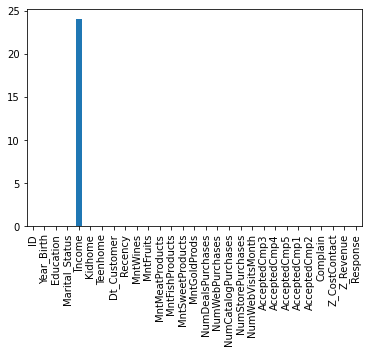

In [3]:
df.isna().sum().plot(kind='bar')

In [4]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [5]:
MNT_COLUMNS = ['MntFruits', 'MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntSweetProducts']
NUM_COLUMNS = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

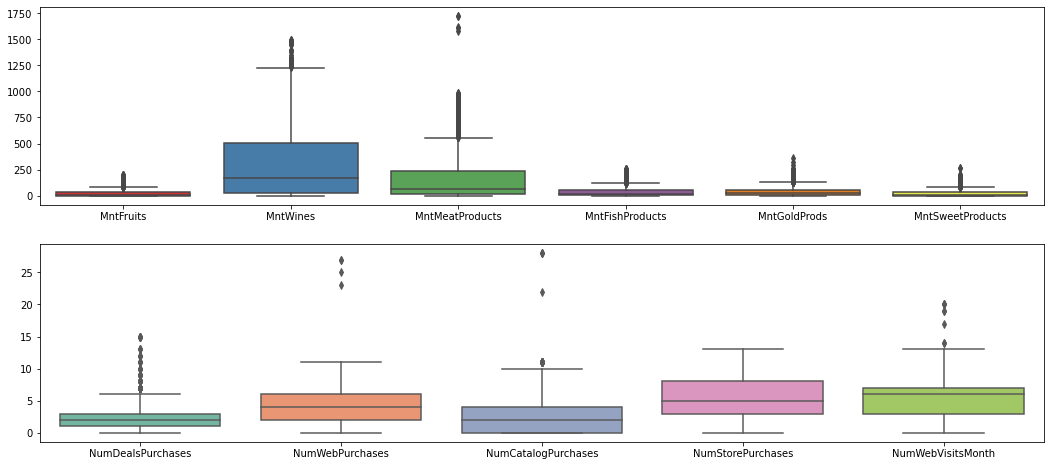

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(18, 8))
ax1 = sns.boxplot(data=df[MNT_COLUMNS], palette="Set1", ax=axes[0])
ax2 = sns.boxplot(data=df[NUM_COLUMNS], palette="Set2",ax=axes[1])

In [7]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

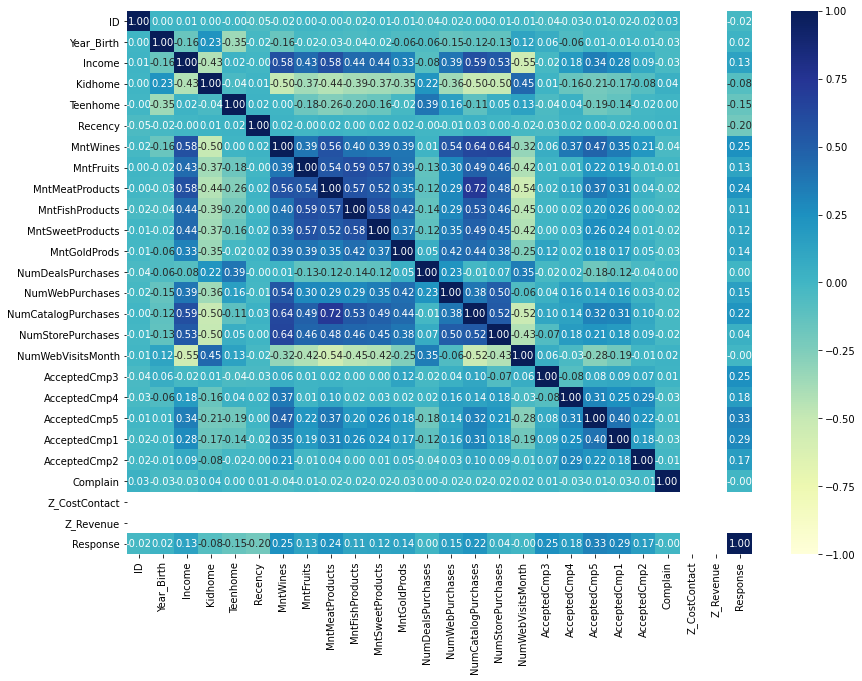

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=-1);

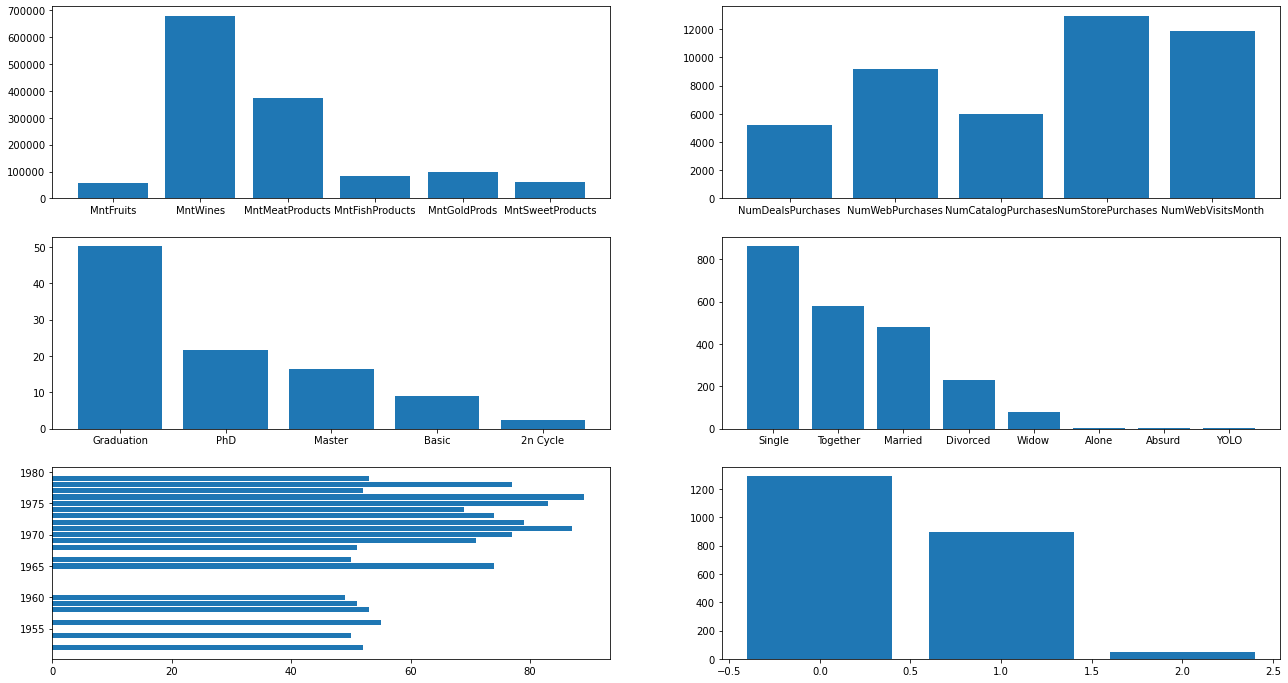

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(22, 12))
ax1 = axes[0, 0].bar(df[MNT_COLUMNS].columns, df[MNT_COLUMNS].sum())
ax2 = axes[0, 1].bar(df[NUM_COLUMNS].columns, df[NUM_COLUMNS].sum())
ax3 = axes[1, 0].bar(df['Education'].unique(), df['Education'].value_counts(normalize=True)*100)
ax4 = axes[1, 1].bar(df['Marital_Status'].unique(), df['Marital_Status'].value_counts())
ax5 = axes[2, 0].barh(df['Year_Birth'].value_counts().sort_values(ascending = False).head(20).index, df['Year_Birth'].value_counts().sort_values(ascending = False).head(20))
ax4 = axes[2, 1].bar(df['Kidhome'].value_counts().index, df['Kidhome'].value_counts())

In [10]:
df['Kidhome'].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>,
        <AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>],
       [<AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:title={'center':'AcceptedCmp3'}>,
        <AxesSubplot:title={'center':'AcceptedCmp4'}>,
 

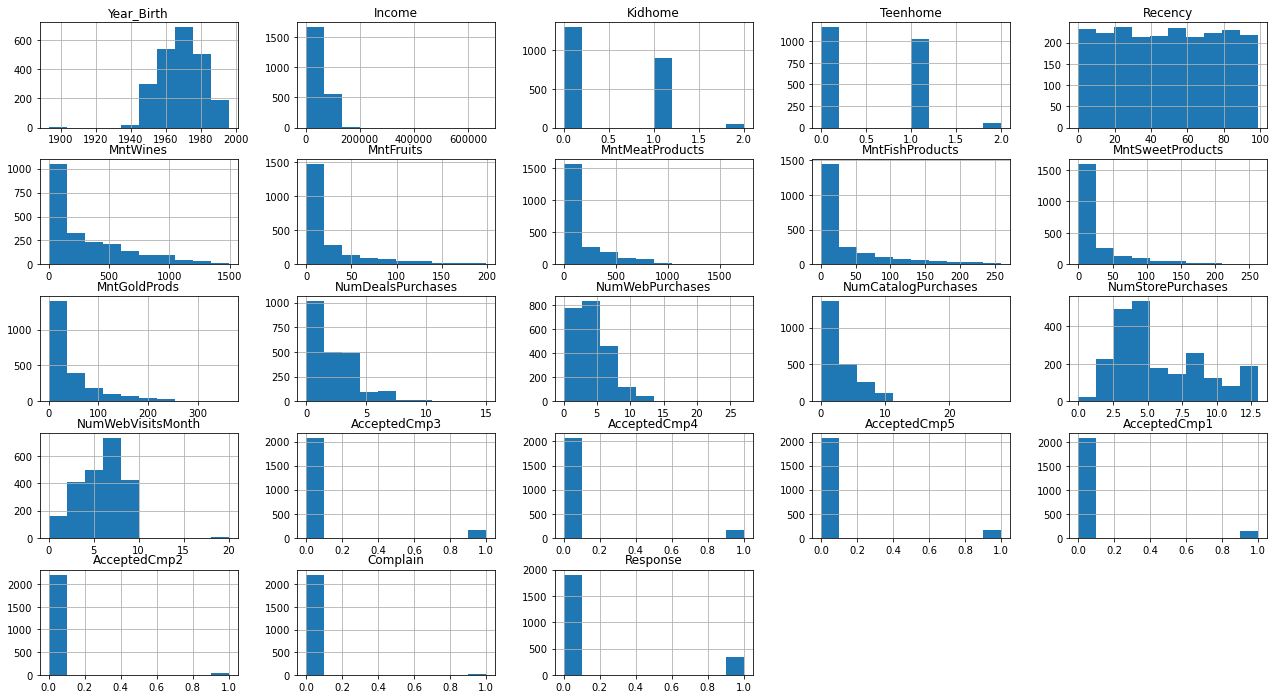

In [11]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis = 1).hist(figsize=(22,12))

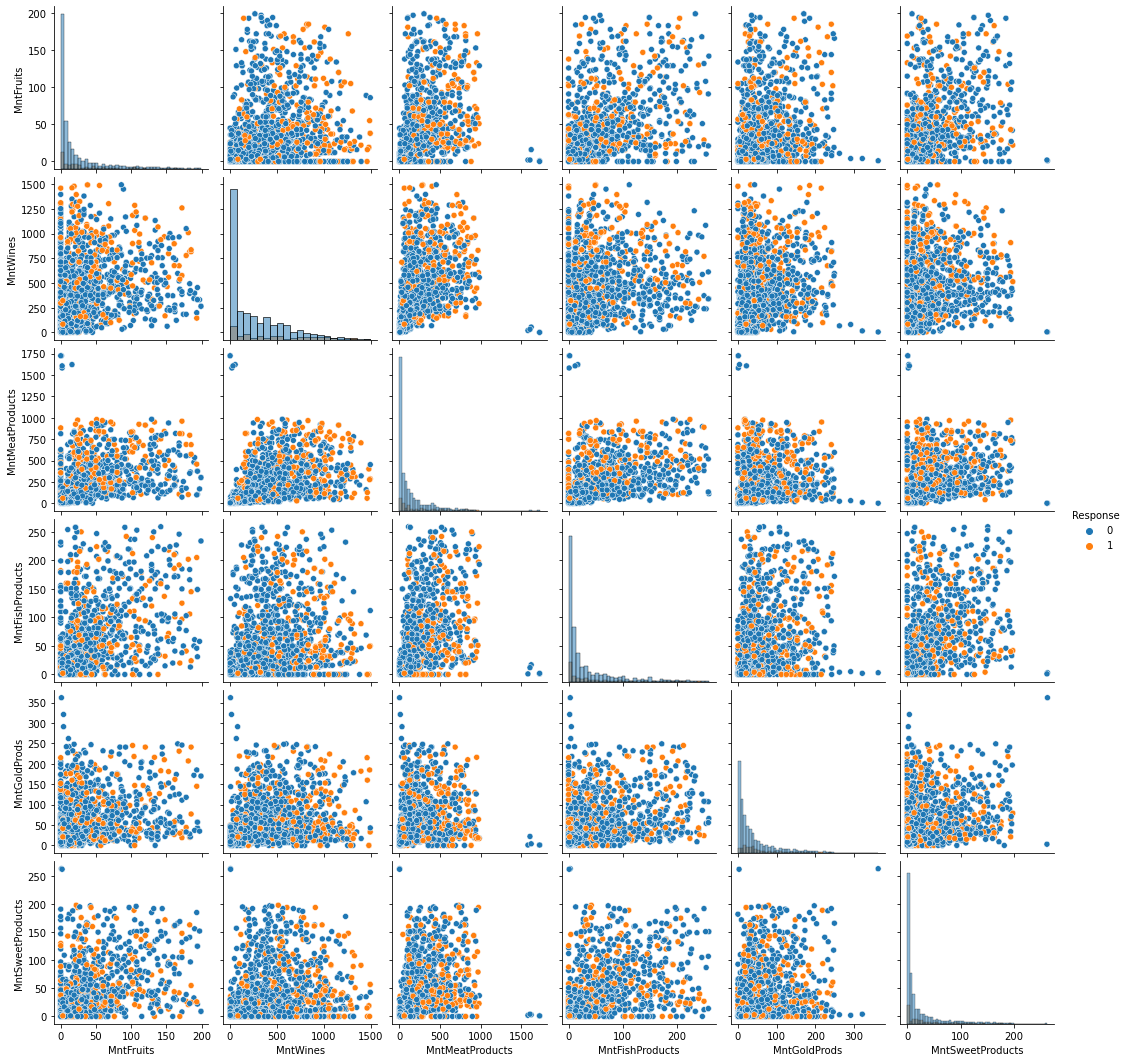

In [12]:
sns.pairplot(df, vars = MNT_COLUMNS, hue='Response', diag_kind = 'hist')
plt.show()

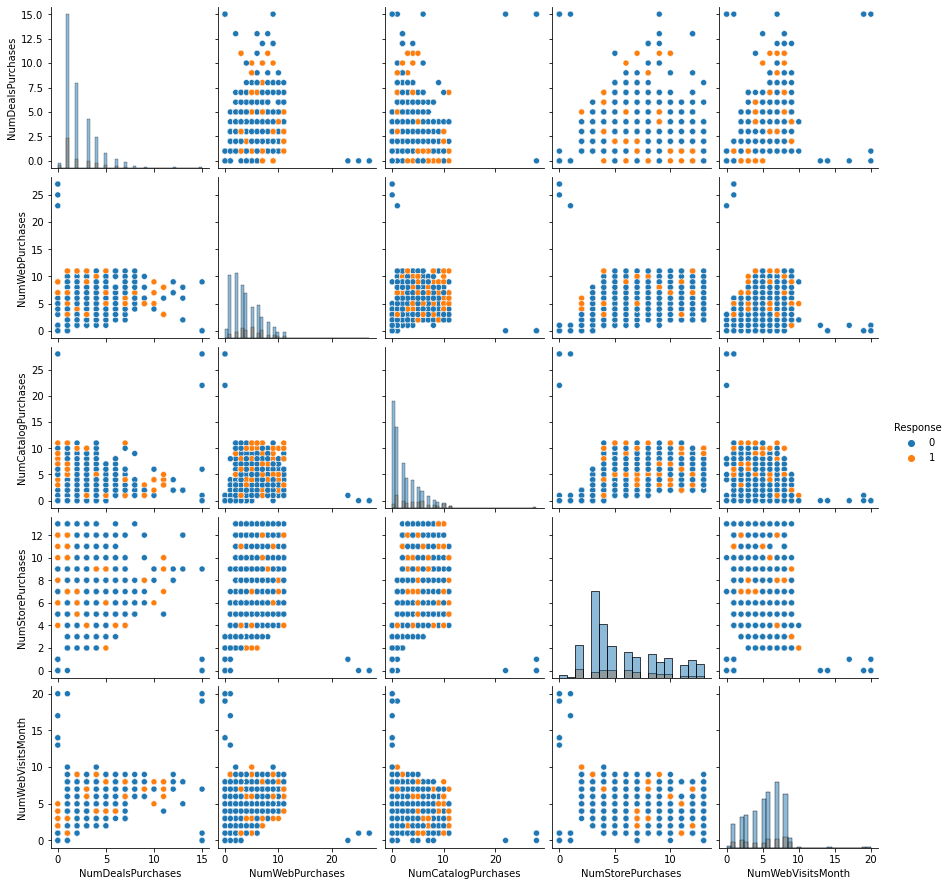

In [13]:
sns.pairplot(df, vars = NUM_COLUMNS, hue='Response', diag_kind = 'hist')
plt.show()

<AxesSubplot:>

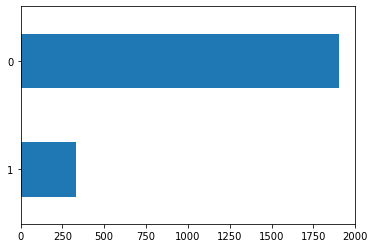

In [14]:
df.Response.value_counts().sort_values().plot(kind = 'barh')

## Pré Processamento

In [15]:
df = df.copy().dropna()

In [16]:
df = df.loc[df['Year_Birth'] > 1900]

In [17]:
df = df.loc[df['MntMeatProducts'] < 1000]

In [18]:
df = df.loc[df['Income'] < 150000]

In [19]:
df['Marital_Status'].value_counts()

Married     853
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Divorced = Single

Widow = Single

Alone = Single

Absurd = Single

YOLO = Single

In [20]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if x in ['Single' , 'Widow' , 'Alone' , 'Absurd' , 'YOLO'] else x)

In [21]:
df['Marital_Status'].value_counts()

Married     853
Together    568
Single      553
Divorced    230
Name: Marital_Status, dtype: int64

In [22]:
df = df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis = 1)

<AxesSubplot:>

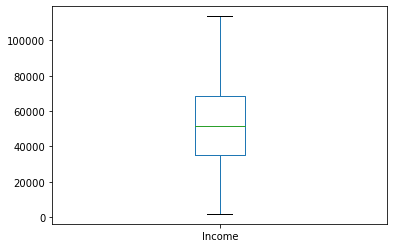

In [23]:
df.Income.plot(kind = 'box')

In [24]:
df[NUM_COLUMNS] = StandardScaler().fit_transform(df[NUM_COLUMNS])
df[MNT_COLUMNS] = StandardScaler().fit_transform(df[MNT_COLUMNS])
df[['Income', 'Recency']] = StandardScaler().fit_transform(df[['Income', 'Recency']])

# Feature Engineering

In [25]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()

<Figure size 864x720 with 0 Axes>

In [26]:
#Correlation with output variable
cor_target = abs(cor["Response"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.10]


In [27]:

relevant_features = list(relevant_features.index)

In [28]:
relevant_features.append('Education')
relevant_features.append('Marital_Status')

In [29]:
df = df[relevant_features].copy()


In [30]:
df

,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Education,Marital_Status
0,0.313904,0,0.310654,0.974115,1.548116,1.772001,2.448544,1.479812,0.849120,1.424495,2.682485,0,0,0,0,0,1,Graduation,Single
1,-0.256225,1,-0.380629,-0.875150,-0.638868,-0.736891,-0.652568,-0.635602,-0.736093,-1.133958,-0.594988,0,0,0,0,0,0,Graduation,Single
2,0.965294,0,-0.795398,0.354730,0.567744,-0.174713,1.335792,-0.149300,-0.040146,1.424495,-0.230824,0,0,0,0,0,0,Graduation,Together
3,-1.208438,0,-0.795398,-0.875150,-0.563455,-0.671846,-0.506633,-0.586971,-0.755425,-0.768464,-0.959152,0,0,0,0,0,0,Graduation,Together
4,0.321397,0,1.554963,-0.395053,0.416917,-0.216528,0.150073,-0.003409,-0.562106,0.328015,0.133339,0,0,0,0,0,0,PhD,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.463035,1,-0.104116,1.193419,0.416917,0.080822,0.077106,2.209266,3.922885,1.789988,0.133339,0,0,0,0,0,0,Graduation,Married
2236,0.597953,1,0.241525,0.295458,-0.664006,-0.625385,-0.689051,-0.659917,-0.697429,1.424495,-0.230824,0,0,0,1,0,0,PhD,Together
2237,0.257974,0,1.451270,1.783169,0.542606,0.243435,-0.105313,-0.368136,-0.388120,-0.768464,0.133339,0,1,0,0,0,0,Graduation,Divorced
2238,0.850823,1,-1.417553,0.360657,0.090126,0.229497,0.770295,0.069536,0.327159,0.693508,0.861667,0,0,0,0,0,0,Master,Together


In [31]:
# df['Year_Birth'].sub(2022, axis = 0).abs()
df = pd.get_dummies(df)

# Modelagem

In [49]:
X = df.drop('Response', axis = 1)
y = df['Response']

In [50]:
y.value_counts()

0    1871
1     333
Name: Response, dtype: int64

In [65]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Random Forest

In [66]:
param_grid = { 
    'n_estimators': [100, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
rfc=RandomForestClassifier(random_state=42)
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500]})

In [67]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [53]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred = clf.predict(X_test)

In [55]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       638
           1       0.91      0.93      0.92       597

    accuracy                           0.92      1235
   macro avg       0.92      0.92      0.92      1235
weighted avg       0.92      0.92      0.92      1235



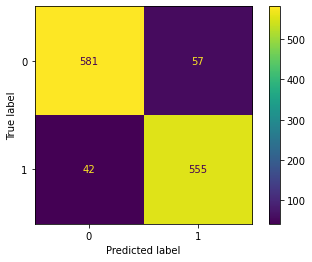

In [57]:
metrics.plot_confusion_matrix(clf, X_test, y_test)

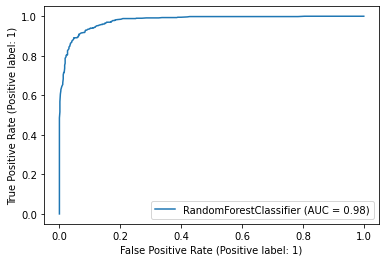

In [58]:
metrics.plot_roc_curve(clf, X_test, y_test)